In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import objects

In [67]:
filename= "easy/v1_46_309_Modern_Evolutionary_Biology.pkl"
with open(filename, 'rb') as f:
    data = pickle.load(f)


In [68]:
from collections import defaultdict

# get attribute frequencies
data_types = ["publications","researchers","resources","projects","others"]

attibute_frequencies_per_data_type = {}
for data_type in data_types:
    attribute_frequencies = {}
    for data_object in data[data_type]:
        for attr_name, attr_value in data_object.__dict__.items():
                if attr_value and (not isinstance(attr_value,str) or (attr_value.replace("0","").replace(".","") != "")):
                    attribute_frequencies[attr_name] =attribute_frequencies.get(attr_name, 0) + 1
    attibute_frequencies_per_data_type[data_type] = attribute_frequencies

In [69]:
object_types_per_data_type = {}
for data_type in data_types:
    object_types = {}
    for data_object in data[data_type]:
        object_type = type(data_object).__name__
        object_types[object_type] = object_types.get(object_type, 0) + 1
    object_types_per_data_type[data_type] = object_types

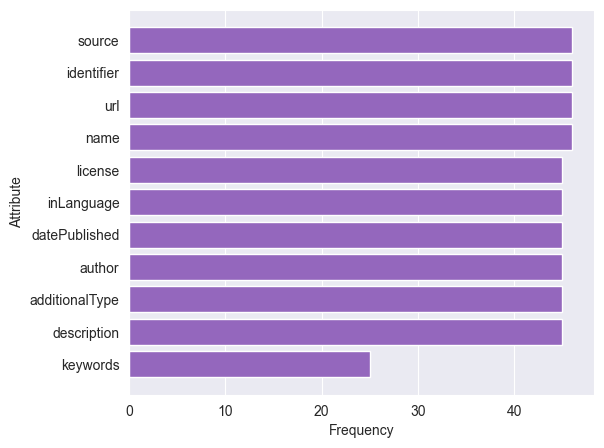

In [72]:
#plot attribute_frequencies
data_type="resources"
attribute_frequencies = attibute_frequencies_per_data_type[data_type]
exclude_attr= ["rankScore", "encoding_contentUrl","__len__","originalSource", "partiallyLoaded"]

# plot as diagram
frequencies = sorted([(key, val) for key, val in attribute_frequencies.items() if key not in exclude_attr], key=lambda item: item[1])

from embeddings.embedding_utils import single_plot_color
plt.figure(figsize=(6, 5))
plt.barh([x[0] for x in frequencies], [x[1] for x in frequencies], color=single_plot_color)
plt.gca().yaxis.grid(False)
plt.ylabel("Attribute")
plt.xlabel("Frequency")
plt.savefig(f"figures_data_exploration/{data_type}_attribute_frequencies.png", dpi=300, bbox_inches='tight')
plt.show()

In [71]:
additionalType_freq_per_data_type = {}
for data_type in ["publications","resources","projects","others"]:
    # get the additionalType frequencies
    additionalType_freq = {}
    for data_object in data[data_type]:
        additionalType = data_object.additionalType
        if additionalType:
            additionalType_freq[additionalType] = additionalType_freq.get(additionalType, 0) + 1
    additionalType_freq_per_data_type[data_type] = additionalType_freq

In [77]:
for i,obj in enumerate(data["others"]):
    if len(obj.keywords)>0:
        print(i)

0
1
3
5
6
7
8
9
10
11
12
13
14
15
16
19
22
23
24
25
29
30
32
34
35
36
37
38
39
41
43
44
45
46
47
48
49
53
